In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
#tHE Clothing Fashion-MNIST is a dataset of images from Zalando (Europe's biggest online fashion retailer)
# it consists of 60000 training samples and 10000 testing samples
# Each sample is a 28*28 grayscale image associated with a label from 10 classes
# http://yann.lecun.com/exdb/mnist/

10 classes are:


1.   T-shirt/top

1.   Trouser

1.   Pullover

1.   Dress

1.   Coat

1.   Sandal

2.   Shirt

2.   Sneaker

2.   bag

2.   Ankle Boot





In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

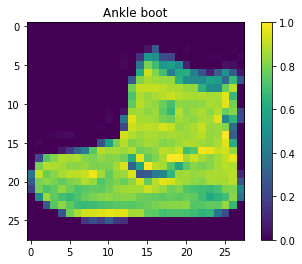

In [22]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.title(classes[y_train[0]])
plt.show()

In [5]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
X_train = X_train/255.0
X_test = X_test/255.0

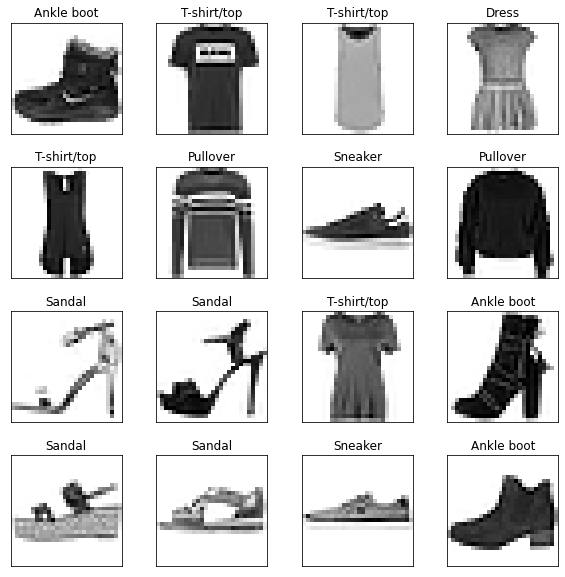

In [20]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.subplots_adjust(hspace=.3)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.grid(False)
    plt.title(classes[y_train[i]])
plt.show()    

# Architecting CNN model

____

### The CNN has two main components: 
The feature extractor composed of a set of convolutional and pooling layers and the classifier backend similar to a
regular neural network

In [6]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_train.shape

(60000, 28, 28, 1)

The first dimension is the number of samples


---
The fourth dimension is the appended one representing the grayscale images


In [7]:
# random seed in tensorflow for reproducility
tf.random.set_seed(42)
from tensorflow.keras import datasets, layers, models, losses
model = models.Sequential()
# first convolutional layer with 32 3*3 filters
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
# second convolutional layer with 64 3*3 filters          
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# third convolutional layer with 128 3*3 filters
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#The resulting filter maps are flatten to provide features to the downstream classifier backend
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [8]:
model.compile(optimizer='adam',
              loss=losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                7

In [9]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.4754 - accuracy: 0.8244 - val_loss: 0.3424 - val_accuracy: 0.8771
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3060 - accuracy: 0.8875 - val_loss: 0.3521 - val_accuracy: 0.8685
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2598 - accuracy: 0.9047 - val_loss: 0.2850 - val_accuracy: 0.8925
Epoch 4/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2303 - accuracy: 0.9147 - val_loss: 0.2606 - val_accuracy: 0.9087
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2058 - accuracy: 0.9230 - val_loss: 0.2620 - val_accuracy: 0.9074
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1826 - accuracy: 0.9313 - val_loss: 0.2546 - val_accuracy: 0.9080
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1619 - accuracy: 0.9391 - val_loss: 0.2686 -

In [10]:
# 96% on training set and 91% on the testing set
# double check the performance
test_loss = test_acc = model.evaluate(X_test, y_test, verbose = 2)
test_acc

313/313 - 2s - loss: 0.2991 - accuracy: 0.9119


[0.29906368255615234, 0.911899983882904]

In [11]:
y_pred = model.predict(X_test)
y_pred[0]

array([7.5550666e-10, 3.0286134e-09, 1.0539910e-09, 2.8722500e-13,
       5.6034349e-08, 4.5324073e-06, 8.6176873e-12, 3.0690931e-05,
       6.5056571e-11, 9.9996471e-01], dtype=float32)

In [36]:
print('Predicted label for the first test sample: ', np.argmax(y_pred[0]))
print('True label for the first test sample: ', y_test[0])

Predicted label for the first test sample:  9
True label for the first test sample:  9


In [37]:
def plot_image_prediction(i, images, predictions, labels, class_names):
    plt.subplot(1,2,1)
    plt.imshow(images[i], cmap=plt.cm.binary)
    prediction = np.argmax(predictions[i])
    color = 'blue' if prediction == labels[i] else 'red'
    plt.title(f"{class_names[labels[i]]} (predicted {class_names[prediction]})", color=color)
    plt.subplot(1,2,2)
    plt.grid(False)
    plt.xticks(range(10))
    plot = plt.bar(range(10), predictions[i], color="#777777")
    plt.ylim([0, 1])
    plot[prediction].set_color('red')
    plot[labels[i]].set_color('blue')
    plt.show()

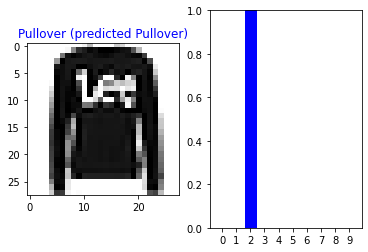

In [40]:
plot_image_prediction(1, X_test, y_pred, y_test, classes)

In [12]:
filters, biases = model.layers[2].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max-f_min)

In [17]:
filters

array([[[[0.589374  , 0.5160577 , 0.728113  , ..., 0.56763184,
          0.66437435, 0.5482579 ],
         [0.6661359 , 0.48570934, 0.6407575 , ..., 0.6071685 ,
          0.661258  , 0.42053676],
         [0.629286  , 0.5372689 , 0.68527764, ..., 0.5755494 ,
          0.5685546 , 0.7479954 ],
         ...,
         [0.7083973 , 0.6497562 , 0.5668708 , ..., 0.55620253,
          0.53605115, 0.6525372 ],
         [0.61956716, 0.5215421 , 0.66168034, ..., 0.6735251 ,
          0.5877956 , 0.67968184],
         [0.55868393, 0.5406895 , 0.48072216, ..., 0.48630887,
          0.6147635 , 0.6895384 ]],

        [[0.58751994, 0.5766741 , 0.4494259 , ..., 0.3598829 ,
          0.5186097 , 0.44331104],
         [0.64339375, 0.41571525, 0.77600914, ..., 0.67684686,
          0.4977599 , 0.44596744],
         [0.6723975 , 0.43998736, 0.73344386, ..., 0.6280844 ,
          0.4670438 , 0.51560473],
         ...,
         [0.53000224, 0.42546695, 0.5522388 , ..., 0.35488912,
          0.54178023, 0.6

In [18]:
filters.shape

(3, 3, 32, 64)

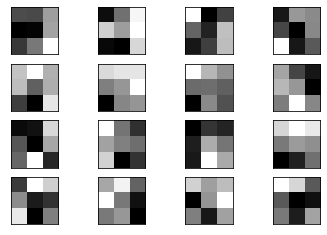

In [16]:
n_filters = 16
for i in range(n_filters):
  filter = filters[:, :, :, i]
  plt.subplot(4, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(filter[:, :, 0], cmap='gray')

plt.show()

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
n_small = 500
X_train = X_train[:n_small]
y_train = y_train[:n_small]
print(X_train.shape)

(500, 28, 28, 1)


In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [21]:
model.compile(optimizer='adam',
               loss=losses.sparse_categorical_crossentropy,
               metrics=['accuracy'])

In [23]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=40)

Epoch 1/20
13/13 [==============================] - 3s 198ms/step - loss: 2.0069 - accuracy: 0.3300 - val_loss: 1.5974 - val_accuracy: 0.3579
Epoch 2/20
13/13 [==============================] - 2s 155ms/step - loss: 1.3587 - accuracy: 0.4840 - val_loss: 1.2414 - val_accuracy: 0.5318
Epoch 3/20
13/13 [==============================] - 2s 173ms/step - loss: 0.9758 - accuracy: 0.6780 - val_loss: 0.9527 - val_accuracy: 0.6803
Epoch 4/20
13/13 [==============================] - 2s 154ms/step - loss: 0.7251 - accuracy: 0.7580 - val_loss: 0.7879 - val_accuracy: 0.7271
Epoch 5/20
13/13 [==============================] - 2s 160ms/step - loss: 0.6252 - accuracy: 0.8020 - val_loss: 0.7541 - val_accuracy: 0.7276
Epoch 6/20
13/13 [==============================] - 2s 163ms/step - loss: 0.5171 - accuracy: 0.8240 - val_loss: 0.8521 - val_accuracy: 0.7102
Epoch 7/20
13/13 [==============================] - 2s 163ms/step - loss: 0.4791 - accuracy: 0.8320 - val_loss: 0.7001 - val_accuracy: 0.7567
Epoch 

In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Accuracy on test set:', test_acc)

313/313 - 2s - loss: 0.7463 - accuracy: 0.7973
Accuracy on test set: 0.7972999811172485


The accuracy  without augmentation has a classification accuracy of 79.5%

In [26]:
datagen = ImageDataGenerator(height_shift_range=3,
                              horizontal_flip=True)

In [27]:
model_aug = tf.keras.models.clone_model(model)

In [28]:
model_aug.compile(optimizer='adam',
               loss=losses.sparse_categorical_crossentropy,
               metrics=['accuracy'])

In [30]:
train_generator = datagen.flow(X_train, y_train, seed=42, batch_size=40)
model_aug.fit(train_generator, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
13/13 [==============================] - 3s 182ms/step - loss: 2.0577 - accuracy: 0.2580 - val_loss: 1.7102 - val_accuracy: 0.3282
Epoch 2/50
13/13 [==============================] - 2s 158ms/step - loss: 1.4170 - accuracy: 0.5020 - val_loss: 1.1927 - val_accuracy: 0.5302
Epoch 3/50
13/13 [==============================] - 2s 187ms/step - loss: 1.0015 - accuracy: 0.6400 - val_loss: 0.9144 - val_accuracy: 0.6633
Epoch 4/50
13/13 [==============================] - 2s 196ms/step - loss: 0.8887 - accuracy: 0.6480 - val_loss: 0.8996 - val_accuracy: 0.6687
Epoch 5/50
13/13 [==============================] - 2s 179ms/step - loss: 0.7510 - accuracy: 0.7500 - val_loss: 0.7605 - val_accuracy: 0.7248
Epoch 6/50
13/13 [==============================] - 2s 179ms/step - loss: 0.7033 - accuracy: 0.7320 - val_loss: 0.7671 - val_accuracy: 0.7188
Epoch 7/50
13/13 [==============================] - 2s 178ms/step - loss: 0.6759 - accuracy: 0.7720 - val_loss: 0.6943 - val_accuracy: 0.7515
Epoch 

In [31]:
test_loss, test_acc = model_aug.evaluate(X_test, y_test, verbose=2)
print('Accuracy on test set: ',test_acc)

313/313 - 2s - loss: 0.7918 - accuracy: 0.7978
Accuracy on test set:  0.7978000044822693
